# Problem Statement

#### Create a Ham / Spam classifier using Naive Bayes Algorithm

### Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set()

### Importing dataset

In [2]:
df = pd.read_csv('dataset/emails.csv')
df.head()

text  spam
0  Subject: naturally irresistible your corporate...     1
1  Subject: the stock trading gunslinger  fanny i...     1
2  Subject: unbelievable new homes made easy  im ...     1
3  Subject: 4 color printing special  request add...     1
4  Subject: do not have money , get software cds ...     1

In [3]:
df.tail()

text  spam
5723  Subject: re : research and development charges...     0
5724  Subject: re : receipts from visit  jim ,  than...     0
5725  Subject: re : enron case study update  wow ! a...     0
5726  Subject: re : interest  david ,  please , call...     0
5727  Subject: news : aurora 5 . 2 update  aurora ve...     0

In [4]:
df.describe()

spam
count  5728.000000
mean      0.238827
std       0.426404
min       0.000000
25%       0.000000
50%       0.000000
75%       0.000000
max       1.000000

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5728 entries, 0 to 5727
Data columns (total 2 columns):
text    5728 non-null object
spam    5728 non-null int64
dtypes: int64(1), object(1)
memory usage: 89.6+ KB


In [21]:
df["spam"].value_counts()[1]

1368

In [6]:
print(f'% of Ham : {df["spam"].value_counts()[0]/len(df)*100}%')
print(f'% of Spam : {df["spam"].value_counts()[1]/len(df)*100}%')

% of Ham : 76.11731843575419%
% of Spam : 23.88268156424581%


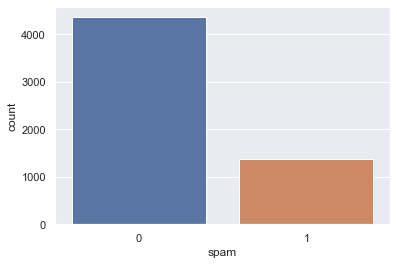

In [7]:
sns.countplot(df['spam'],label='Count')

## Creating training and testing data and creating numerical features (featurizing)

# CountVectorizer

In [8]:
from sklearn.feature_extraction.text import CountVectorizer

sample = ['This is the first document.',
         'This is the second document.',
         'Is this the third document?',
         'And this is the third one.']

vectorizer = CountVectorizer()

X = vectorizer.fit_transform(sample)

In [9]:
X

<4x9 sparse matrix of type '<class 'numpy.int64'>'
	with 21 stored elements in Compressed Sparse Row format>

In [10]:
vectorizer.get_feature_names()

['and', 'document', 'first', 'is', 'one', 'second', 'the', 'third', 'this']

In [11]:
print(X.toarray())

[[0 1 1 1 0 0 1 0 1]
 [0 1 0 1 0 1 1 0 1]
 [0 1 0 1 0 0 1 1 1]
 [1 0 0 1 1 0 1 1 1]]


### Applying it to spam/ham example

In [12]:
%%time
spam_cv = vectorizer.fit_transform(df['text'])

CPU times: user 924 ms, sys: 25.6 ms, total: 949 ms
Wall time: 962 ms


In [13]:
print(vectorizer.get_feature_names())

['00', '000', '0000', '000000', '00000000', '0000000000', '000000000003619', '000000000003991', '000000000003997', '000000000005168', '000000000005409', '000000000005411', '000000000005412', '000000000005413', '000000000005820', '000000000006238', '000000000006452', '000000000007494', '000000000007498', '000000000007876', '000000000010552', '000000000011185', '000000000012677', '000000000012734', '000000000012735', '000000000012736', '000000000012738', '000000000012741', '000000000012987', '000000000013085', '000000000013287', '000000000015384', '000000000015793', '000000000023619', '000000000024099', '000000000025307', '000000000025312', '000010220', '0000102317', '0000102374', '0000102789', '0000104281', '0000104282', '0000104486', '0000104631', '0000104730', '0000104776', '0000104778', '0000107043', '0000108729', '000066', '0001', '000166', '0002', '000202', '0003', '0004', '0005', '0006', '00076', '0009249480', '0009249481', '0009249504', '0009249505', '0009249506', '001', '0011', 

In [14]:
print(spam_cv.toarray())

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [4 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [15]:
spam_cv.shape

(5728, 37303)

### Train model using all the dataset

In [16]:
from sklearn.naive_bayes import MultinomialNB

nbClx = MultinomialNB()
labels = df['spam'].values

nbClx.fit(spam_cv,labels)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [23]:
test = ['Money !!',
        'The lockdown is extended but people are still going out.',
        'Blackjack Stake ! $ 1010303'
       ]
cv = vectorizer.transform(test)

In [24]:
test_pred = nbClx.predict(cv)

test_pred

array([1, 0, 1])

## hw : use train_test_split, train the classifier using training dataset and evaluate it using test dataset

In [26]:
from sklearn.model_selection import train_test_split

X = spam_cv
y = labels

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)

X_train.shape

(4582, 37303)

In [27]:
nbClx2 = MultinomialNB()
nbClx2.fit(X_train,y_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

## Evaluating model

In [33]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

y_pred_train = nbClx2.predict(X_train)

print(f'Training Accuracy : {accuracy_score(y_pred_train,y_train)}')
print(f'\n\nClassification Report:\n\n {classification_report(y_pred_train,y_train)}')
print(f'\n\nConfusion Matrix:\n {confusion_matrix(y_pred_train,y_train)}')

Training Accuracy : 0.9975993016150153


Classification Report:

               precision    recall  f1-score   support

           0       1.00      1.00      1.00      3495
           1       1.00      0.99      0.99      1087

    accuracy                           1.00      4582
   macro avg       1.00      1.00      1.00      4582
weighted avg       1.00      1.00      1.00      4582



Confusion Matrix:
 [[3494    1]
 [  10 1077]]


In [35]:
y_pred = nbClx2.predict(X_test)

print(f'Training Accuracy : {accuracy_score(y_pred,y_test)}')
print(f'\n\nClassification Report:\n\n {classification_report(y_pred,y_test)}')
print(f'\n\nConfusion Matrix:\n {confusion_matrix(y_pred,y_test)}')

Training Accuracy : 0.9912739965095986


Classification Report:

               precision    recall  f1-score   support

           0       0.99      1.00      0.99       850
           1       0.99      0.97      0.98       296

    accuracy                           0.99      1146
   macro avg       0.99      0.99      0.99      1146
weighted avg       0.99      0.99      0.99      1146



Confusion Matrix:
 [[848   2]
 [  8 288]]


### Accuracy Score : 99.13%

# Great Job !